# Predict Student Dropout and Academic Success

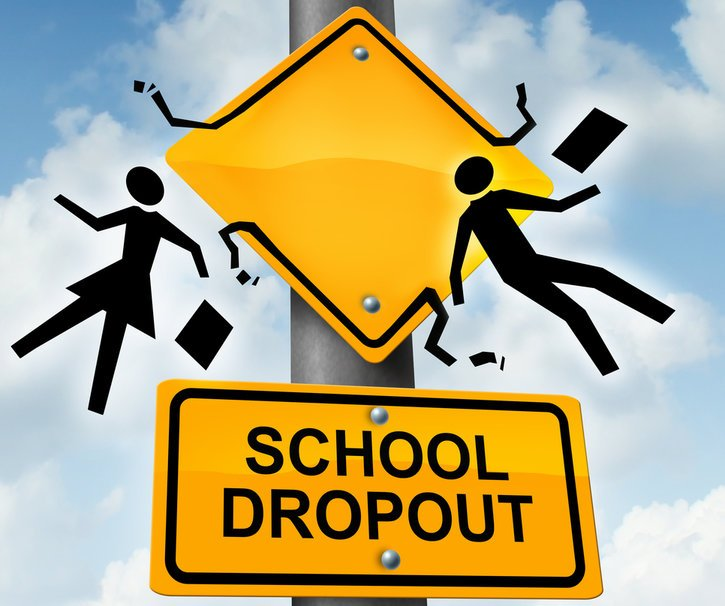

The main goal of this project is to analyze student dropout rates in Gujarat's school education system, using the dataset "Predict Students' Dropout and Academic Success - Investigating the Impact of Social and Economic Factors." Despite potential limitations like lacking school, area, or caste data, we aim to extract meaningful insights from the existing attributes.

Demographic Analysis: We'll examine gender, age at enrollment, marital status, and nationality to understand how these factors relate to student dropout rates.

Economic Factors: We'll study parental occupation, tuition fee payment status, and scholarship eligibility to uncover their impact on student dropout rates.

Academic Performance: We'll analyze curricular units and evaluations to see how students' academic performance influences their chances of dropping out.

Social and Special Needs: We'll investigate if students with educational special needs or facing challenges like displacement or debt are more prone to dropping out.

Macro-economic Factors: This heading appears incomplete. Could you provide more details on what you'd like to include here?

In [1]:
# Importing required libraries
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [23]:
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading dataset
data = pd.read_csv("dropout.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
#data dimension
data.shape

(4424, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

## Data Preprocessing

In [6]:
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [7]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

So there are 3 unique values in target column which we can replace by

Dropout - 0
Enrolled - 1
Graduate - 2

In [8]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [9]:
print(data["Target"].unique())

[0 2 1]


In [10]:
# Correlation
data.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nationality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

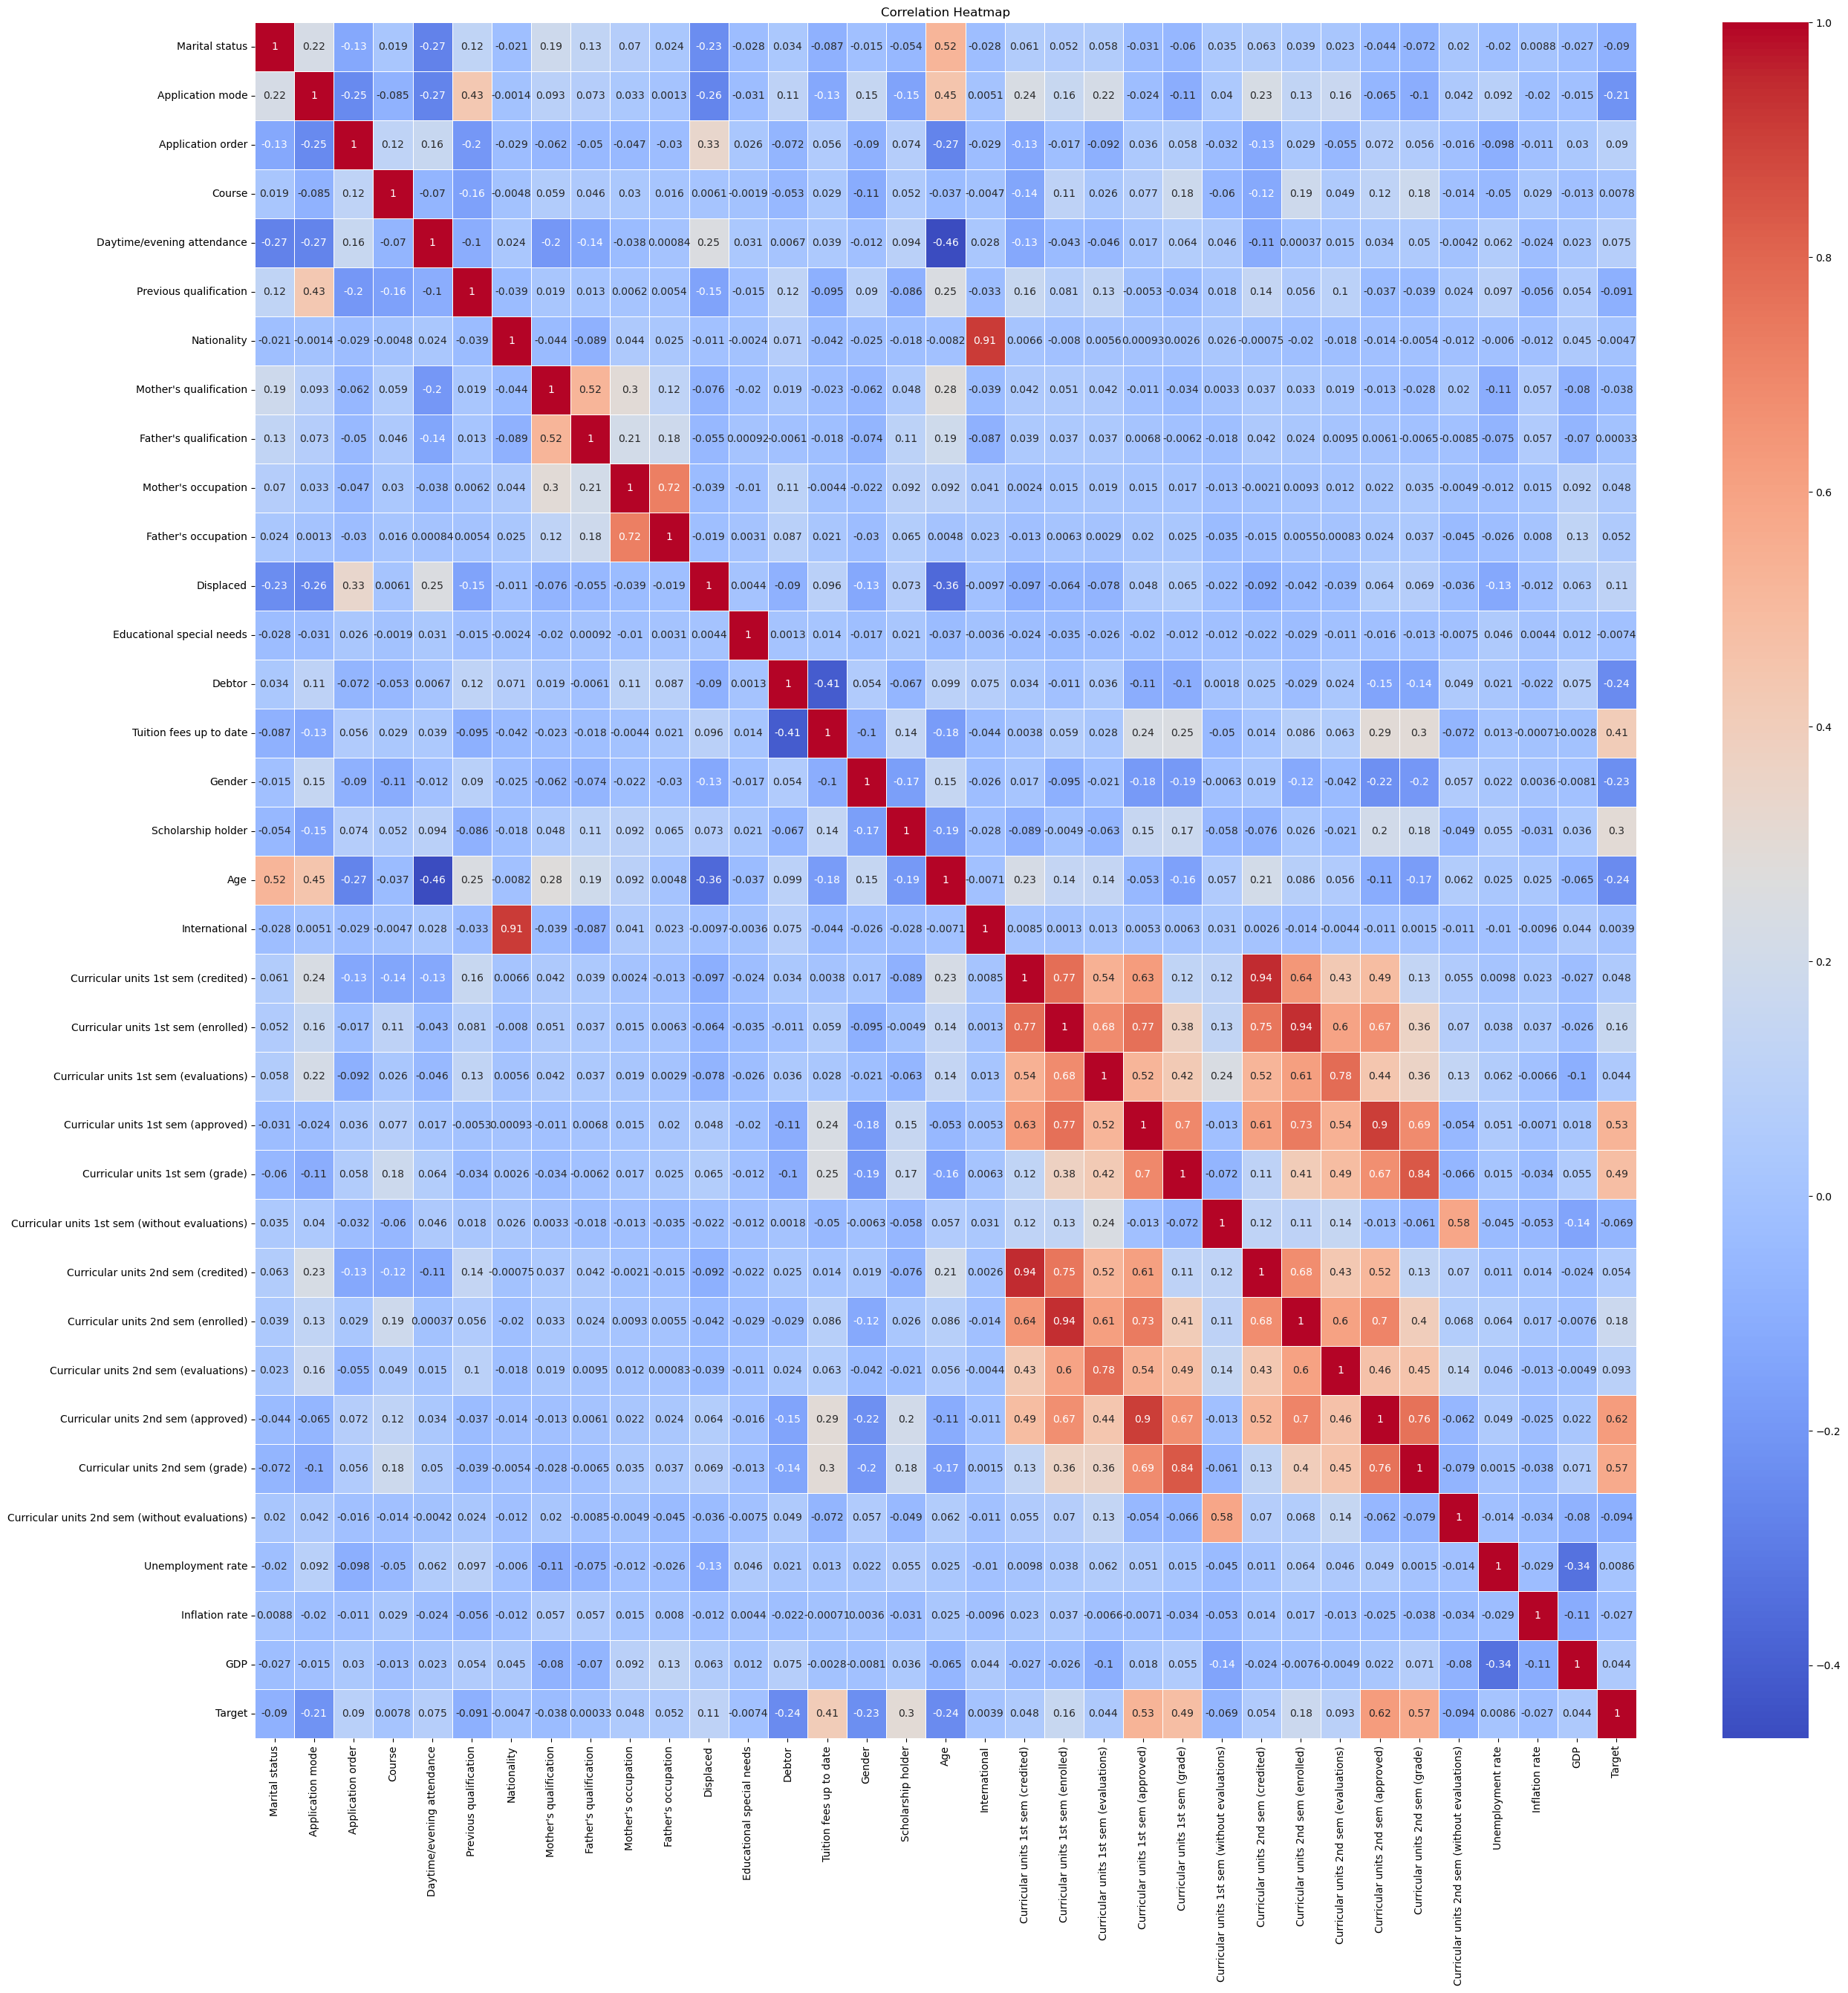

In [11]:
#Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Columns to remove based on low correlation with the target variable ('Target')

Nationality: Since its correlation is very close to zero (-0.004740), it may not have a significant impact on the target variable.

Mother's qualification: With a correlation of -0.038346, it appears to have a weak relationship with the target variable.

Father's qualification: Similarly, with a correlation of 0.000329, it seems to have little influence on the target variable.

Educational special needs: This column has a low correlation of -0.007353, suggesting it may not strongly affect the target variable.

International: With a correlation of 0.003934, this column has minimal impact on the target variable.

Curricular units 1st sem (without evaluations): It has a correlation of -0.068702, which is relatively low compared to other columns related to curricular units.

Unemployment rate: This column's correlation of 0.008627 indicates a weak relationship with the target variable.

Inflation rate: With a correlation of -0.026874, it has a relatively low impact on the target variable.

In [12]:
new_data = data.copy()
new_data = new_data.drop(columns=['Nationality', 
                                  'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

# Exploratory Data Analysis

In [13]:
new_data['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

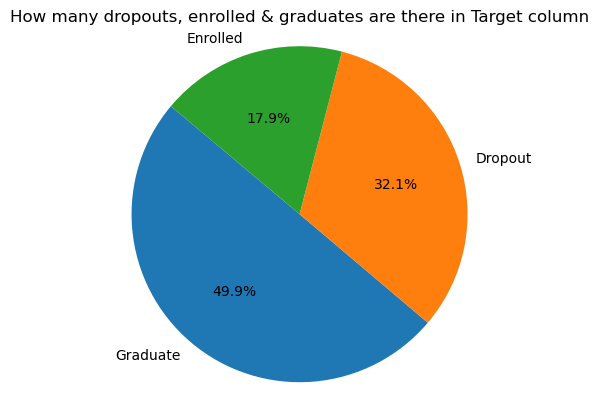

In [15]:
x = new_data['Target'].value_counts().index
y = new_data['Target'].value_counts().values

# Plot
plt.pie(y, labels=['Graduate', 'Dropout', 'Enrolled'], autopct='%1.1f%%', startangle=140)
plt.title('How many dropouts, enrolled & graduates are there in Target column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Top 10 Features with Highest Correlation to Target

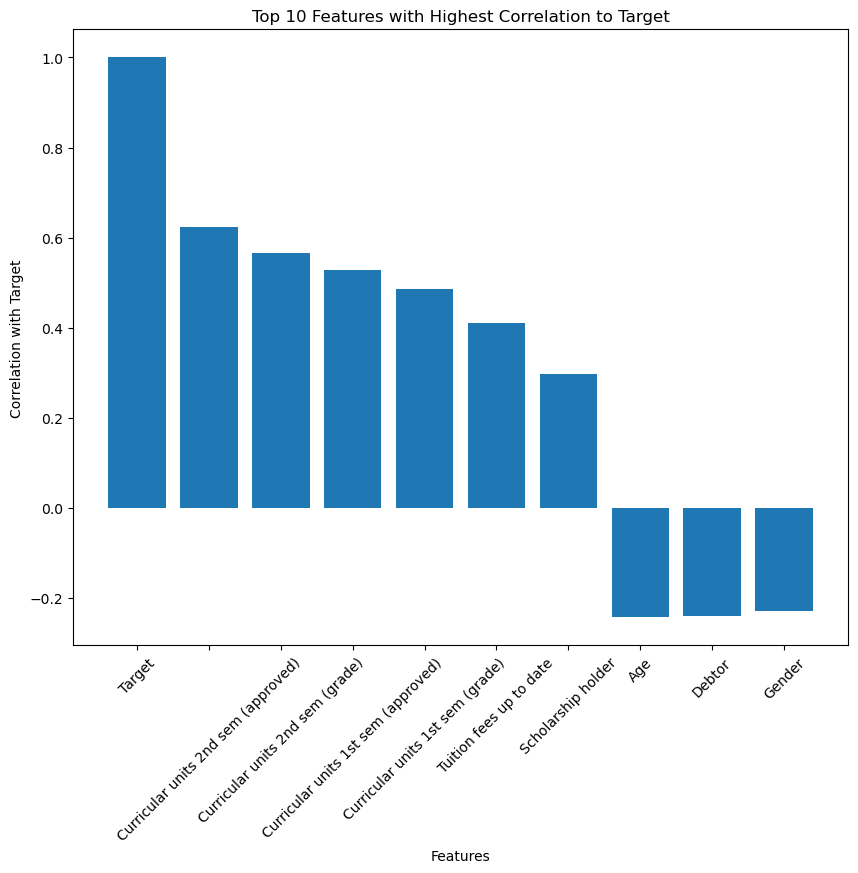

In [19]:
correlations = data.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 8))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

# Distribution of Age of Students during enrollment

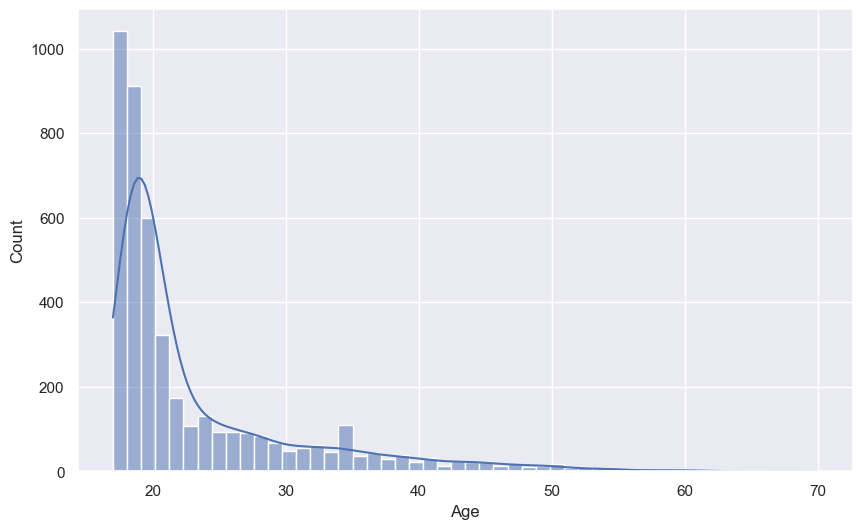

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Age', data=data, bins = 50, kde = True)
plt.show()

# Relationship between Age and target

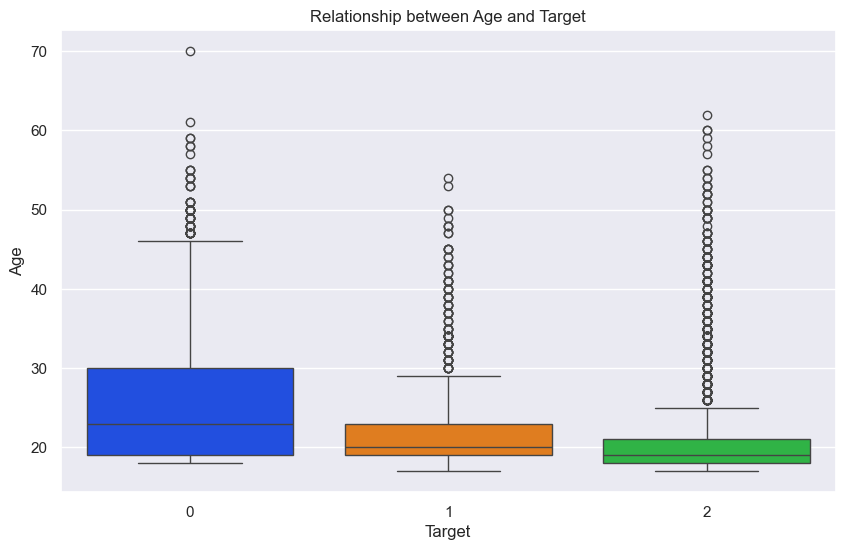

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=new_data, palette = 'bright')
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

# Segregating Target and Variable

In [35]:
X = new_data.drop('Target', axis=1)
y = new_data['Target']

# Splitting the training and Testing data

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Building Models

In [44]:
from sklearn.svm import SVC

In [46]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
xbc = XGBClassifier(tree_method='hist')
svm_classifier = SVC(kernel='linear', probability=True)

# Training the Models

In [47]:
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
abc.fit(X_train, y_train)
xbc.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

# Evaluating Prediction Accuracy

In [48]:
y_pred = dtree.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 69.38 %


In [50]:
y_pred = rfc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 80.56 %


In [51]:
y_pred = lr.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 78.08 %


In [52]:
y_pred = knn.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 69.27 %


In [53]:
y_pred = abc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 77.18 %


In [54]:
y_pred = xbc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 78.98 %


In [56]:
y_pred = svm_classifier.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 77.06 %


# So, Lets improve our accuracy using Ensemble Voting Classifier

In [57]:
#param_grid = {
#    'bootstrap': [False,True],
#    'max_depth': [5,8,10, 20],
#    'max_features': [3, 4, 5, None],
#    'min_samples_split': [2, 10, 12],
#    'n_estimators': [100, 200, 300]
#}

#clf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

#clf.fit(X_train,y_train)
#y_pred = clf.predict(X_test)
#print("Accuracy: ",accuracy_score(y_test,y_pred))
#print(clf.best_params_)
#print(clf.best_estimator_)

In [58]:
ens1 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='soft')
ens1.fit(X_train, y_train)

y_pred = ens1.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 80.0 %


In [59]:
ens2 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='hard')
ens2.fit(X_train, y_train)

y_pred = ens2.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 80.68 %


# Model Selection
Select the model which gives maximum accuracy. So we select Random Forest with accuracy 76.94 & 77.08 with Cross Validation

In [62]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)

print("With CV: ",scores.mean())
print("Precision Score: ", precision_score(y_test, y_pred,average='macro'))
print("Recall Score: ", recall_score(y_test, y_pred,average='macro'))
print("F1 Score: ", f1_score(y_test, y_pred,average='macro'))

Without CV:  0.7954802259887006
With CV:  0.7575590979657816
Precision Score:  0.7614694332414501
Recall Score:  0.6996419971879351
F1 Score:  0.716194599778707


In [63]:
param_grid = {
    'bootstrap': [False,True],
    'max_depth': [5,8,10, 20],
    'max_features': [3, 4, 5, None],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [100, 200, 300]
}

rfc = RandomForestClassifier()

clf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print(clf.best_params_)
print(clf.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.8067796610169492
{'bootstrap': False, 'max_depth': 20, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 300}
RandomForestClassifier(bootstrap=False, max_depth=20, max_features=3,
                       min_samples_split=10, n_estimators=300)
